# Step 1: Reading and Understanding the Data

### Importing Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

### Reading the Dataset:

In [3]:
ngo_data = pd.read_csv("Country-data.csv")
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Getting idea about number of rows and columns:

In [4]:
ngo_data.shape

(167, 10)

##### Checking Missing Values:

In [5]:
ngo_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### Checking Data Types:

In [6]:
ngo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


##### As per the Data Dictionary, `exports`, `health` and `imports` are given in percentage of total GDP. Let's convert these columns into actual values of their GDPP. Percentage values will not give a clear idea in data analysis.

In [7]:
ngo_data['exports'] = ngo_data['exports']*ngo_data['gdpp']/100
ngo_data['health'] = ngo_data['health']*ngo_data['gdpp']/100
ngo_data['imports'] = ngo_data['imports']*ngo_data['gdpp']/100

In [8]:
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


##### Reading Statistics:

In [9]:
ngo_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step 2: Data Cleaning and  Preparation

##### Checking Outliers:

In [10]:
ngo_data.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


##### Visualizing through Box-plot:

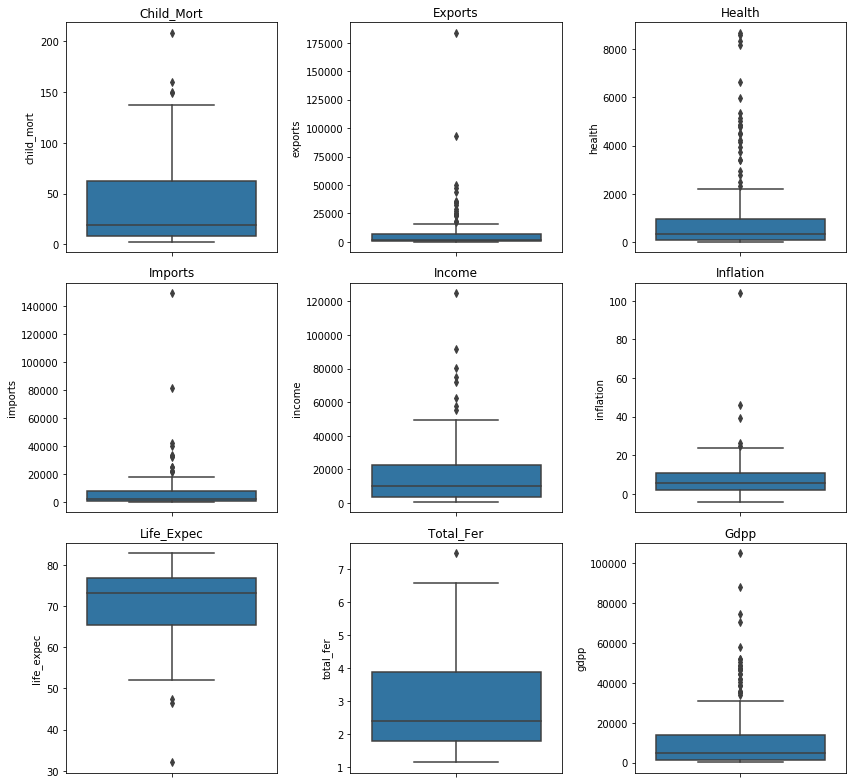

In [11]:
plt.figure(figsize=(12,11))
for i in range(1, len(ngo_data.columns)):
    plt.subplot(3,3,i)
    sns.boxplot(y = ngo_data.columns[i], data=ngo_data)
    plt.title(ngo_data.columns[i].title())
    plt.tight_layout()

As per the above statistics and Box-plots, we can see outliers are present in the data. Let's treat them.

##### Treating outliers:

In [12]:
cols = list(ngo_data.select_dtypes(['int64', 'float64']).columns)
Q1 = ngo_data[cols].quantile(0.05)
Q3 = ngo_data[cols].quantile(0.95)
IQR = Q3 - Q1
ngo_data = ngo_data[~((ngo_data[cols] <= Q1) | (ngo_data[cols] >= Q3)).any(axis=1)]

##### Checking shape of the DataFrame after outlier treatment:

In [13]:
ngo_data.shape

(95, 10)

# Step 3: Data Visualization

##### Visualization through Pairplot:

<Figure size 216x216 with 0 Axes>

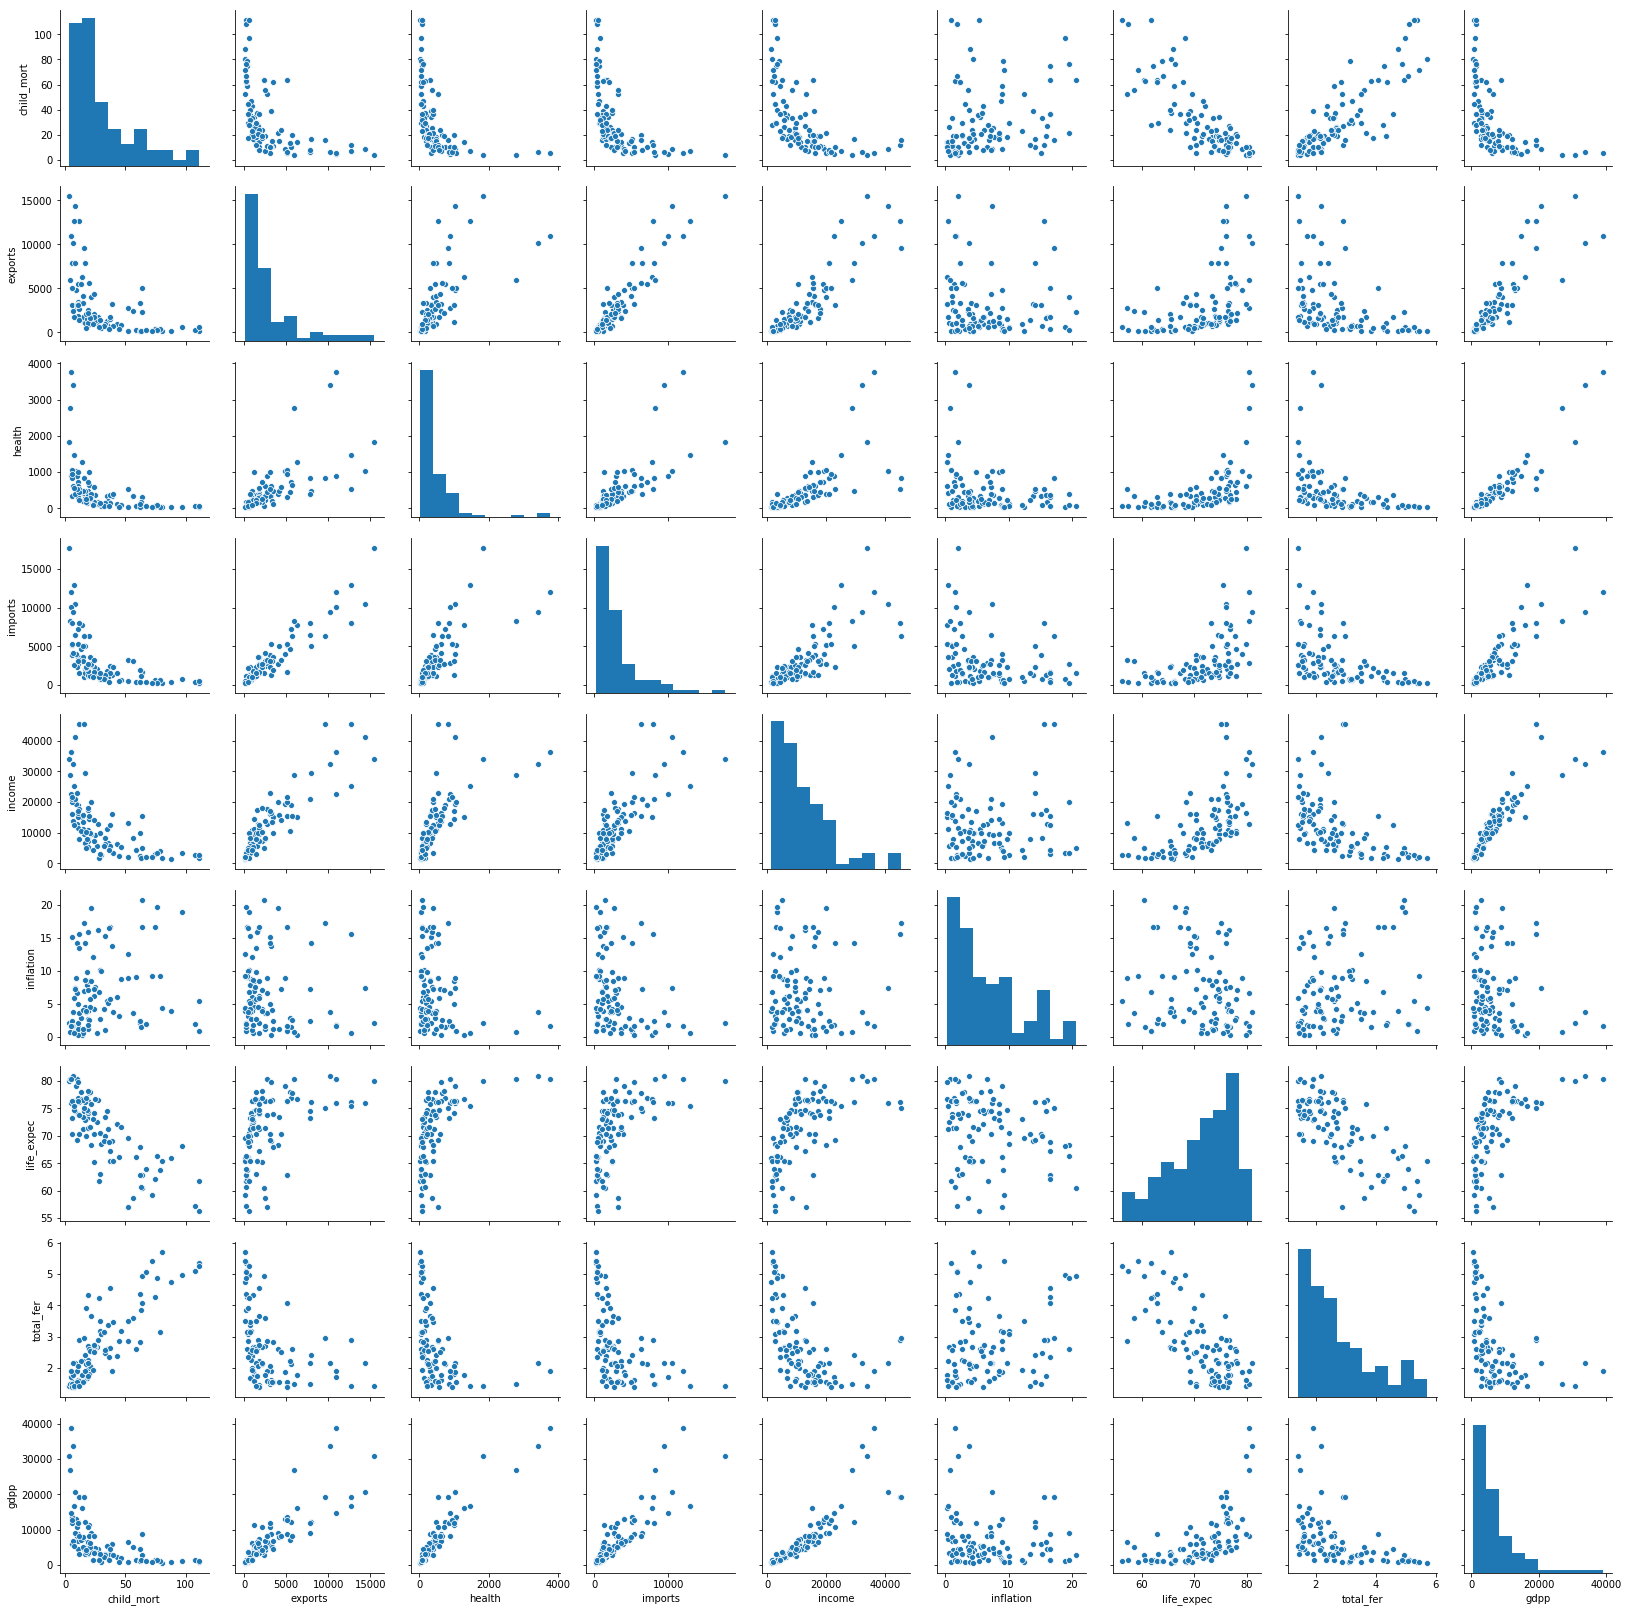

In [14]:
plt.figure(figsize = (3,3))
sns.pairplot(ngo_data)
plt.show()

##### Visualization through Heatmap:

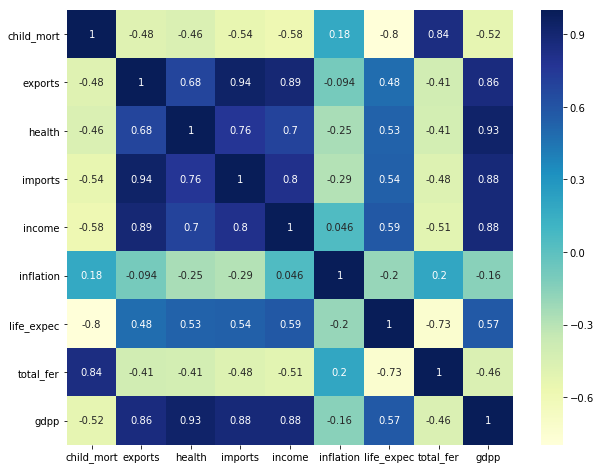

In [15]:
plt.figure(figsize = (10,8))  
sns.heatmap(ngo_data.corr(),annot = True,cmap="YlGnBu")
plt.show()

As per obove 2 plots, it is clear that high correlation is available among variable. Hence, it is a good practice to apply PCA on the Dataset.

##### Apart from `country` column, all columns are continuous. Removing `country` column from the Dataset  for PCA:

In [16]:
ngo_data = ngo_data.set_index('country')

In [17]:
ngo_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460
Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200
Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220
Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.80,69.1,1.92,5840


In [18]:
ngo_data.shape

(95, 9)

# Step 4: Data Standardization

In [19]:
scaler = StandardScaler()
X = ngo_data.copy()
x = scaler.fit_transform(X)

##### Checking first 5 rows after standardization:

In [20]:
x[:5,:]

array([[-0.55109995, -0.53481782, -0.32124852, -0.33515   , -0.23813925,
        -0.42509349,  0.83959387, -0.95793702, -0.39043008],
       [-0.14112257, -0.3669358 , -0.45284756, -0.52243656,  0.06997736,
         1.68607554,  0.87300879,  0.13066978, -0.33850804],
       [-0.79248851,  0.76867608,  0.43024914,  1.32248118,  0.71318377,
        -0.97970723,  0.92313117, -0.53654084,  0.74764483],
       [-0.49362649, -0.67548084, -0.52402187, -0.50387054, -0.57322904,
         0.17134358,  0.33837005, -0.92282068, -0.51251703],
       [ 0.31483359,  0.06456807, -0.19995723, -0.58352393,  0.39158056,
         1.26784223, -0.3633433 , -0.72090167, -0.14485288]])

# Step 5: PCA Implementation

In [21]:
pca = PCA(random_state=42)

In [22]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

##### Checkig components:

In [23]:
pca.components_

array([[-3.21102864e-01,  3.67147424e-01,  3.50971949e-01,
         3.81161639e-01,  3.74837689e-01, -9.84158797e-02,
         3.23577591e-01, -2.94811938e-01,  3.89646892e-01],
       [ 4.62259515e-01,  3.13554764e-01,  2.07466942e-01,
         2.11745533e-01,  2.15569848e-01,  2.55700871e-01,
        -3.94020057e-01,  5.13089760e-01,  2.64111048e-01],
       [-1.70754502e-01,  3.15603836e-02, -1.95811344e-01,
        -1.57748549e-01,  2.36173970e-01,  9.00646537e-01,
         1.17546188e-01, -1.52110331e-01, -5.21839826e-02],
       [ 9.61161325e-02, -4.59531352e-01,  6.75844567e-01,
        -3.34282705e-01, -1.61481231e-01,  1.64159659e-01,
         2.59157022e-01,  9.70254089e-02,  2.85448676e-01],
       [-9.84182033e-02, -1.09069540e-01,  2.40098645e-01,
         1.31519158e-04, -7.59818050e-02,  6.50132220e-02,
        -7.58408602e-01, -5.71973101e-01,  9.18342279e-02],
       [-7.94184587e-01, -5.79046940e-02,  7.63101838e-02,
         2.94339233e-02, -9.27021462e-02,  2.166485

##### Checking Variance Ratio:

In [24]:
pca.explained_variance_ratio_

array([0.62750858, 0.15114123, 0.11422267, 0.0451791 , 0.02786067,
       0.01596882, 0.01427806, 0.00260574, 0.00123514])

##### Computing cumulative sum of explained variance ratio:

In [25]:
cum_vari = np.cumsum(pca.explained_variance_ratio_)
cum_vari

array([0.62750858, 0.7786498 , 0.89287247, 0.93805158, 0.96591224,
       0.98188106, 0.99615912, 0.99876486, 1.        ])

##### Plotting Scree Plot:

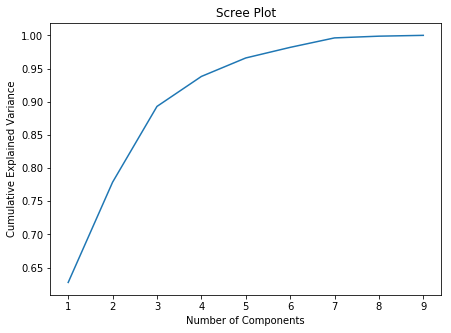

In [26]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cum_vari)+1), cum_vari)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

##### As per the above Scree Plot, around 95% variance is being explained by 5 components. Let's apply PCA with 5 components now:

In [27]:
pc2 = IncrementalPCA(n_components=5)
new_data = pc2.fit_transform(x)

In [28]:
new_data.shape

(95, 5)

##### Taking transpose of the matrix and assigning it in a variable "pc":

In [29]:
pc = new_data.T

##### Creating a Dataframe with Principal Components:

In [30]:
df = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})
df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.094633,-1.645257,0.016639,0.075078,0.088439
1,-0.475121,-0.304793,1.819088,0.429790,0.722041
2,2.303778,-0.294193,-0.695988,-0.457377,0.351694
3,-0.515289,-1.476907,0.470340,0.046524,-0.273118
4,-0.309611,0.144570,1.384248,0.009224,-0.665993


In [31]:
df.shape

(95, 5)

##### Creating Correlation Matrix:

In [32]:
corrmat = np.corrcoef(df.transpose())

##### Visualizing Correlation Matrix through Heatmap:

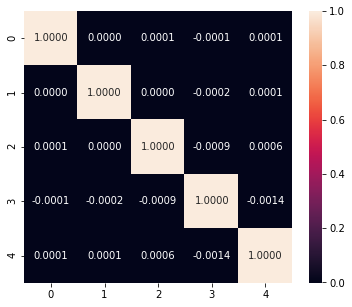

In [33]:
plt.figure(figsize=[6,5])
sns.heatmap(corrmat, annot=True, fmt='.4f')
plt.show()

As per the above heatmap, it is obvious that apart from the diagonal of the Correlation Matrix, other elements are 0.

##### Computing Correlation Matrix without diagonal values:

In [34]:
corrmat_without_diag = corrmat - np.diagflat(corrmat.diagonal())
corrmat_without_diag

array([[ 0.00000000e+00,  1.97709063e-05,  6.51133843e-05,
        -1.38074063e-04,  8.85046132e-05],
       [ 1.97709063e-05,  0.00000000e+00,  2.40109462e-05,
        -1.82055445e-04,  1.13714856e-04],
       [ 6.51133843e-05,  2.40109462e-05,  0.00000000e+00,
        -8.78733600e-04,  5.90831238e-04],
       [-1.38074063e-04, -1.82055445e-04, -8.78733600e-04,
         0.00000000e+00, -1.35548720e-03],
       [ 8.85046132e-05,  1.13714856e-04,  5.90831238e-04,
        -1.35548720e-03,  0.00000000e+00]])

In [35]:
corrmat - corrmat.diagonal()

array([[ 0.        , -0.99998023, -0.99993489, -1.00013807, -0.9999115 ],
       [-0.99998023,  0.        , -0.99997599, -1.00018206, -0.99988629],
       [-0.99993489, -0.99997599,  0.        , -1.00087873, -0.99940917],
       [-1.00013807, -1.00018206, -1.00087873,  0.        , -1.00135549],
       [-0.9999115 , -0.99988629, -0.99940917, -1.00135549,  0.        ]])

In [36]:
print('Max Corr: {}, Min Corr: {}'.format(corrmat_without_diag.max(), corrmat_without_diag.min()))

Max Corr: 0.0005908312384095389, Min Corr: -0.0013554872015927697


We can see that correlations are really close to 0. Let's proceed to apply K-Means Clustering.

# Step 6: Clustering using K-Means

##### Checking Hopkin's Score:

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(df)

0.7107552401408016

Since Hopkins Score is greater than 0.70, the dataset has good charecteristics to form cluster.

##### Plotting Elbow Curve:

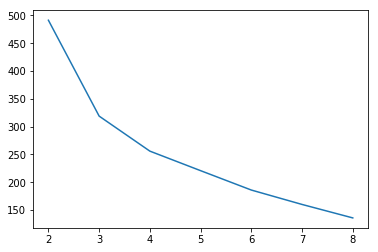

In [38]:
ssd = []
range_num_cluster = [2,3,4,5,6,7,8]
for num_cluster in range_num_cluster:
    kmeans = KMeans(n_clusters=num_cluster, max_iter= 50, random_state=42)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
plt.plot(range_num_cluster, ssd)
plt.show()

In [39]:
range_num_cluster = [2,3,4,5,6,7,8]
for num_cluster in range_num_cluster:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50, random_state=42)
    kmeans.fit(df)
    cluster_label = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_label)
    print('For cluster = {}, silhoutte_score is {}'.format(num_cluster, silhouette_avg))

For cluster = 2, silhoutte_score is 0.4530906332577328
For cluster = 3, silhoutte_score is 0.35335166734940016
For cluster = 4, silhoutte_score is 0.29395915188355815
For cluster = 5, silhoutte_score is 0.2959362510270725
For cluster = 6, silhoutte_score is 0.3090507810937578
For cluster = 7, silhoutte_score is 0.31191358901815713
For cluster = 8, silhoutte_score is 0.319044117479577


##### Silhoutte Analysis:

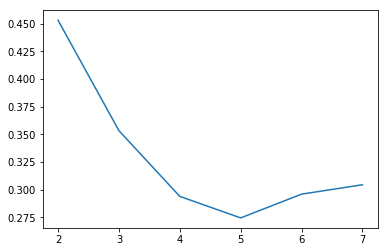

In [40]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(df)
    sse_.append([k, silhouette_score(df, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above Elbow Curve, we can see that elbow formation is pretty good at cluster no. 4. After this point, any further increase in the cluster, does not change the ssd abruptly. Also, as per the Silhoutte Score, it suits 4 clusters would be good. So, let's take k = 4.

##### Applying K-Means with 4 components:

In [41]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

##### Checking cluster labels:

In [42]:
kmeans.labels_

array([1, 1, 0, 1, 1, 2, 0, 0, 1, 3, 1, 1, 3, 0, 0, 1, 3, 1, 0, 1, 1, 3,
       3, 0, 3, 0, 2, 1, 1, 1, 1, 2, 1, 3, 3, 1, 3, 2, 0, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 3, 2, 2,
       0, 1, 1, 1, 0, 0, 0, 1, 2, 3, 0, 2, 3, 1, 3, 0, 1, 3, 0, 1, 1, 0,
       1, 1, 2, 0, 1, 1, 1])

In [43]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.094633,-1.645257,0.016639,0.075078,0.088439
1,-0.475121,-0.304793,1.819088,0.429790,0.722041
2,2.303778,-0.294193,-0.695988,-0.457377,0.351694
3,-0.515289,-1.476907,0.470340,0.046524,-0.273118
4,-0.309611,0.144570,1.384248,0.009224,-0.665993


##### Assigning the copy of the Principal Component Dataframe to the new variable "df_final":

In [44]:
df_final = df.copy()

##### Creating a new column "Cluster_ID" and assigning cluster labels to it:

In [45]:
df_final['Cluster_ID'] = kmeans.labels_
df_final.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_ID
0,0.094633,-1.645257,0.016639,0.075078,0.088439,1
1,-0.475121,-0.304793,1.819088,0.429790,0.722041,1
2,2.303778,-0.294193,-0.695988,-0.457377,0.351694,0
3,-0.515289,-1.476907,0.470340,0.046524,-0.273118,1
4,-0.309611,0.144570,1.384248,0.009224,-0.665993,1


In [46]:
df_final.shape

(95, 6)

##### Checking count of the each cluster formed:

In [47]:
df_final['Cluster_ID'].value_counts()

1    41
0    26
3    19
2     9
Name: Cluster_ID, dtype: int64

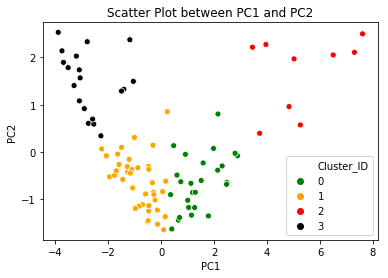

In [48]:
sns.scatterplot(x='PC1', y='PC2', data=df_final, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title("Scatter Plot between PC1 and PC2")
plt.show()

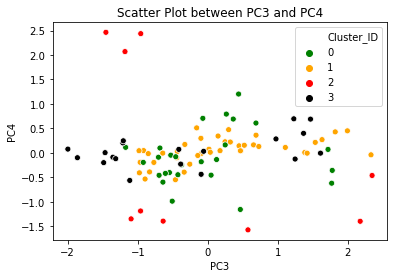

In [49]:
sns.scatterplot(x='PC3', y='PC4', data=df_final, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title("Scatter Plot between PC3 and PC4")
plt.show()

##### Merging K-Means Dataframe "df_final" with original Dataframe:

In [50]:
df_kmeans = pd.merge(ngo_data.reset_index(),df_final,left_index=True,right_index=True )
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,Cluster_ID
0,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0.094633,-1.645257,0.016639,0.075078,0.088439,1
1,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,-0.475121,-0.304793,1.819088,0.429790,0.722041,1
2,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,2.303778,-0.294193,-0.695988,-0.457377,0.351694,0
3,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,-0.515289,-1.476907,0.470340,0.046524,-0.273118,1
4,Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.80,69.1,1.92,5840,-0.309611,0.144570,1.384248,0.009224,-0.665993,1


##### Dropping Principal Components:

In [51]:
df_kmeans_final = df_kmeans.drop(columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_kmeans_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,1
1,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
3,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,1
4,Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.80,69.1,1.92,5840,1


##### Visualizing some of the features through Scatter Plot:

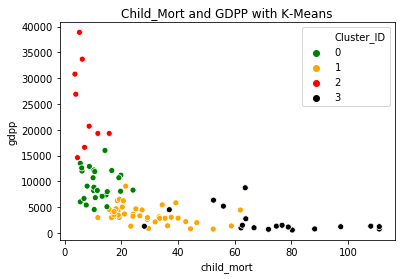

In [52]:
sns.scatterplot(x='child_mort', y='gdpp', data=df_kmeans, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title('Child_Mort and GDPP with K-Means')
plt.show()

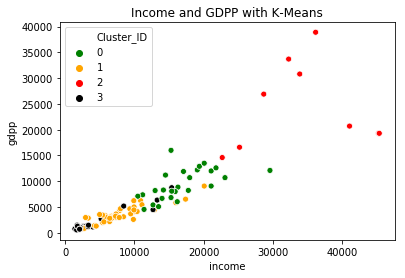

In [53]:
sns.scatterplot(x='income', y='gdpp', data=df_kmeans, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title('Income and GDPP with K-Means')
plt.show()

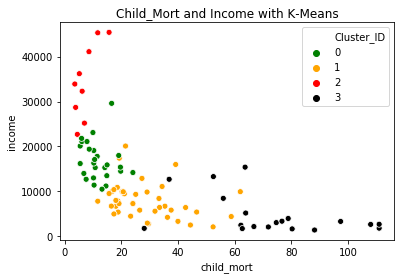

In [54]:
sns.scatterplot(x='child_mort', y='income', data=df_kmeans, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title('Child_Mort and Income with K-Means')
plt.show()

##### Grouping the DataFrame by "Cluster_ID" column and computing other columns by their mean:

In [55]:
df_child_mort_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['child_mort'].mean())
df_child_mort_kmeans

,child_mort
Cluster_ID,
0,11.900000
1,28.700000
2,7.377778
3,73.205263


In [56]:
df_exports_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['exports'].mean())
df_exports_kmeans

,exports
Cluster_ID,
0,4079.760000
1,1286.244585
2,11428.577778
3,992.455158


In [57]:
df_health_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['health'].mean())
df_health_kmeans

,health
Cluster_ID,
0,656.811769
1,203.053785
2,1832.667778
3,134.201074


In [58]:
df_imports_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['imports'].mean())
df_imports_kmeans

,imports
Cluster_ID,
0,4329.255385
1,1529.538732
2,10576.377778
3,958.886684


In [59]:
df_income_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['income'].mean())
df_income_kmeans

,income
Cluster_ID,
0,16830.769231
1,7896.097561
2,34533.333333
3,4698.947368


In [60]:
df_inflation_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['inflation'].mean())
df_inflation_kmeans

,inflation
Cluster_ID,
0,4.846538
1,7.405390
2,5.605333
3,8.871316


In [61]:
df_life_expec_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['life_expec'].mean())
df_life_expec_kmeans

,life_expec
Cluster_ID,
0,75.292308
1,71.495122
2,77.800000
3,62.210526


In [62]:
df_total_fer_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['total_fer'].mean())
df_total_fer_kmeans

,total_fer
Cluster_ID,
0,1.844615
1,2.629268
2,2.017778
3,4.552105


In [63]:
df_gdpp_kmeans = pd.DataFrame(df_kmeans.groupby('Cluster_ID')['gdpp'].mean())
df_gdpp_kmeans

,gdpp
Cluster_ID,
0,9368.846154
1,3554.731707
2,24533.333333
3,2248.842105


##### Merging all the above columns created by grouping of "Cluster_ID":

In [64]:
kmean_merged_df = pd.concat([pd.Series([0,1,2,3]), df_child_mort_kmeans, df_exports_kmeans, df_health_kmeans, df_imports_kmeans, df_income_kmeans, df_inflation_kmeans, df_life_expec_kmeans,  df_total_fer_kmeans, df_gdpp_kmeans], axis=1)

##### Renaming the first column as "Cluster_ID":

In [65]:
kmean_merged_df = kmean_merged_df.rename(columns={0:'Cluster_ID'})
kmean_merged_df

,Cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,11.900000,4079.760000,656.811769,4329.255385,16830.769231,4.846538,75.292308,1.844615,9368.846154
1,1,28.700000,1286.244585,203.053785,1529.538732,7896.097561,7.405390,71.495122,2.629268,3554.731707
2,2,7.377778,11428.577778,1832.667778,10576.377778,34533.333333,5.605333,77.800000,2.017778,24533.333333
3,3,73.205263,992.455158,134.201074,958.886684,4698.947368,8.871316,62.210526,4.552105,2248.842105


##### Visualization through Bar Plot:

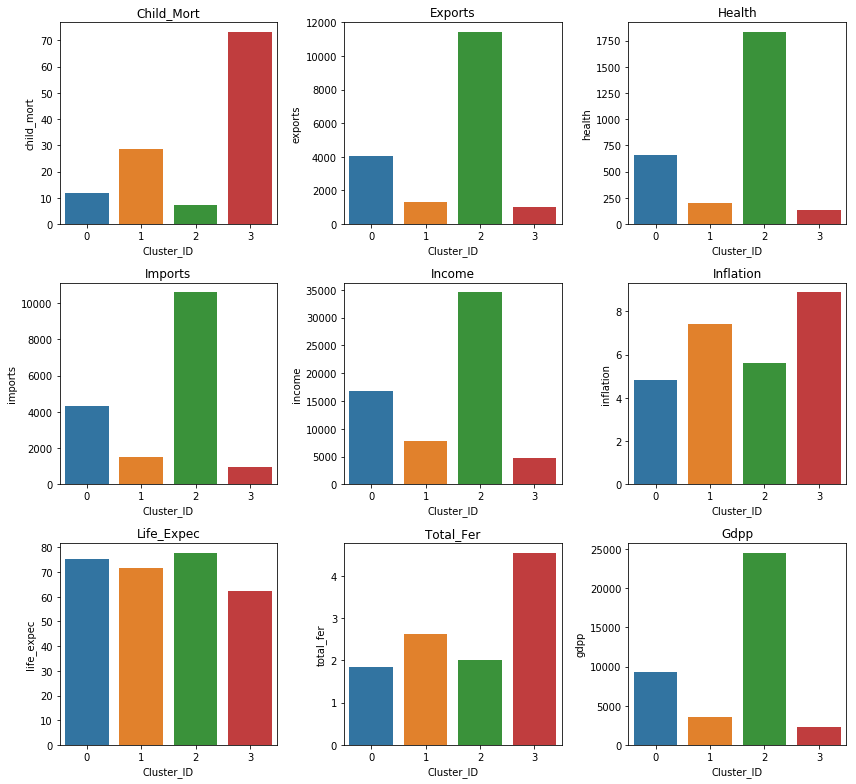

In [66]:
plt.figure(figsize=(12, 11))
for i in range(1, len(kmean_merged_df.columns)):
    plt.subplot(3,3, i)
    sns.barplot(x='Cluster_ID', y=kmean_merged_df.columns[i], data=kmean_merged_df)
    plt.title(kmean_merged_df.columns[i].title())
    plt.tight_layout()

##### Visualization through Boxplot:

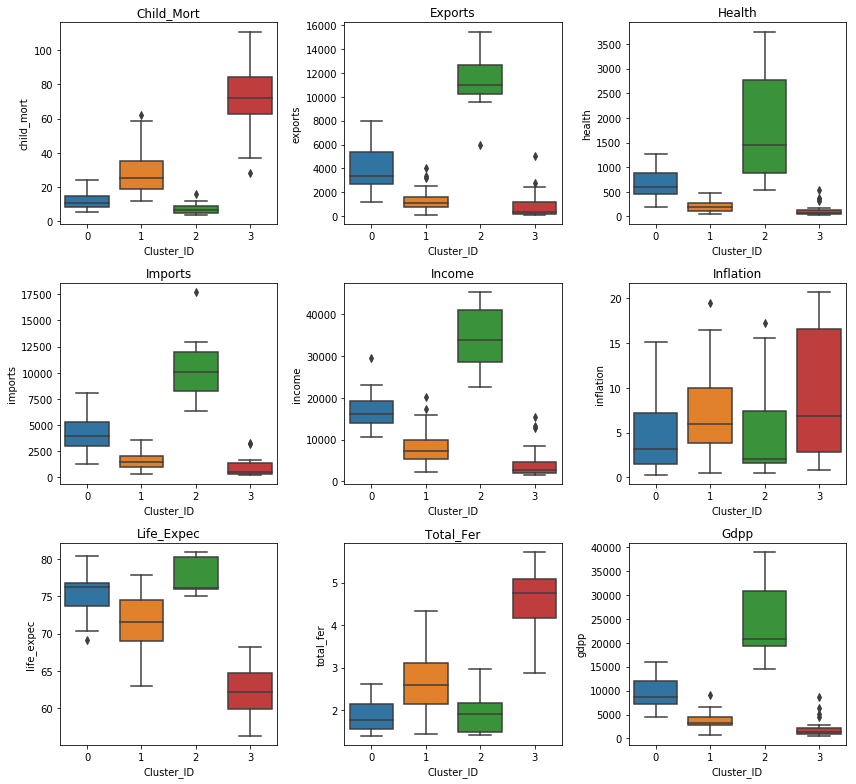

In [67]:
plt.figure(figsize=(12, 11))
for i in range(1, len(df_kmeans_final.columns)-1):
    plt.subplot(3,3, i)
    sns.boxplot(x='Cluster_ID', y=df_kmeans_final.columns[i], data=df_kmeans_final)
    plt.title(df_kmeans_final.columns[i].title())
    plt.tight_layout()

After implementing K-Means Clustering, if we look at above mentioned Barplots and Boxplots, we can observe that cluster 3 needs more attention. Below points explain that `cluster 3` has:
- Highest Child Mortality
- Lowest Income
- Highest Inflation
- Lowest Life Expectancy 
- Highest Total Fertility 
- Lowest GDPP
- Lowest Health Spending

Let's list out the countries belonging to cluster 3.

##### Filtering the Dataframe with "Custer_ID == 3" and observing top 10 countries:

In [68]:
df_cluster_kmeans = df_kmeans_final.loc[(df_kmeans_final['Cluster_ID']==3), :]
df_cluster_kmeans.sort_values(by=['child_mort','exports','health','imports','income', 'inflation', 'life_expec','total_fer','gdpp'], 
                      ascending=[False, True, True, False, True, False, True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
9,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,3
24,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.390,56.3,5.27,1220,3
16,Cameroon,108.0,290.820,67.2030,353.700,2660,1.910,57.3,5.11,1310,3
58,Mauritania,97.4,608.400,52.9200,734.400,3320,18.900,68.2,4.98,1200,3
21,Comoros,88.2,126.885,34.6819,397.573,1410,3.870,65.9,4.75,769,3
34,Gambia,80.3,133.756,31.9778,239.974,1660,4.300,65.5,5.71,562,3
51,Lao,78.9,403.560,50.9580,562.020,3980,9.200,63.8,3.15,1140,3
80,Sudan,76.7,291.560,93.5360,254.560,3370,19.600,66.3,4.88,1480,3
36,Ghana,74.7,386.450,68.3820,601.290,3060,16.600,62.2,4.27,1310,3
83,Tanzania,71.9,131.274,42.1902,204.282,2090,9.250,59.3,5.43,702,3


As per the K-Means Clusteriing, below are the top 10 countries that are in the direst need of aid:
1. Benin
2. Cote d'Ivoire
3. Cameroon
4. Mauritania
5. Comoros
6. Gambia
7. Lao
8. Sudan
9. Ghana
10. Tanzania

# Step 7: Hierarchical Clustering

In [69]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.094633,-1.645257,0.016639,0.075078,0.088439
1,-0.475121,-0.304793,1.819088,0.429790,0.722041
2,2.303778,-0.294193,-0.695988,-0.457377,0.351694
3,-0.515289,-1.476907,0.470340,0.046524,-0.273118
4,-0.309611,0.144570,1.384248,0.009224,-0.665993


##### Single Linkage Dendrogram:

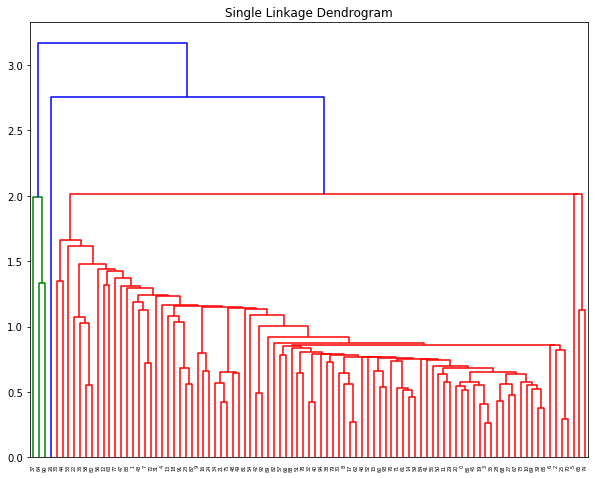

In [70]:
plt.figure(figsize=(10,8))
mergings = linkage(df, method='single', metric='euclidean')
dendrogram(mergings)
plt.title("Single Linkage Dendrogram")
plt.show()

We can see that the Dendrogram is not porperly visible with `Single Linkage`. Let's create a new Dendrodram using `Complete Linkage`.

##### Complete Linkage Dendrogram:

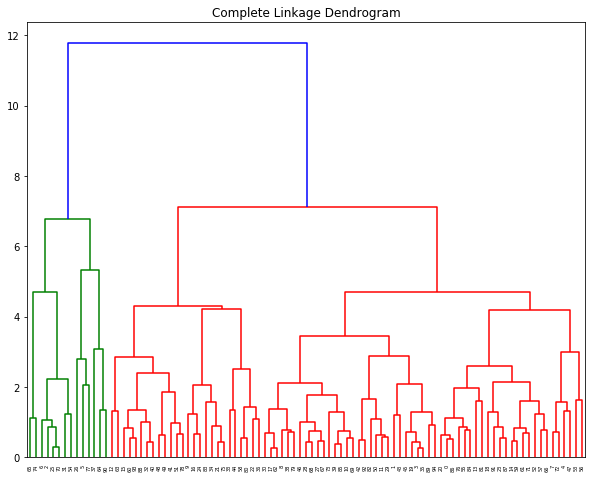

In [71]:
plt.figure(figsize=(10,8))
mergings = linkage(df, method='complete', metric='euclidean')
dendrogram(mergings)
plt.title("Complete Linkage Dendrogram")
plt.show()

##### Creating a Dataframe for Cluster Labels:

In [72]:
cluster_label = pd.DataFrame(cut_tree(mergings, n_clusters=4).reshape(-1, ))
cluster_label.head()

,0
0,0
1,0
2,1
3,0
4,0


##### Merging the original data with Cluster Labels:

In [73]:
df_hierarchical = pd.concat([ngo_data.reset_index(), cluster_label], axis=1)
df_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
1,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0
4,Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.80,69.1,1.92,5840,0


##### Renaming the last column as "Cluster_ID"

In [74]:
df_hierarchical = df_hierarchical.rename(columns={0: 'Cluster_ID'})
df_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
1,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0
4,Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.80,69.1,1.92,5840,0


##### Checking count of the each cluster formed:

In [75]:
df_hierarchical['Cluster_ID'].value_counts()

0    55
3    26
1     8
2     6
Name: Cluster_ID, dtype: int64

##### Visualizing some of the features through Scatter Plot:

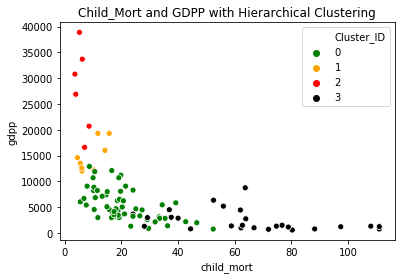

In [76]:
sns.scatterplot(x='child_mort', y='gdpp', data=df_hierarchical, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title('Child_Mort and GDPP with Hierarchical Clustering')
plt.show()

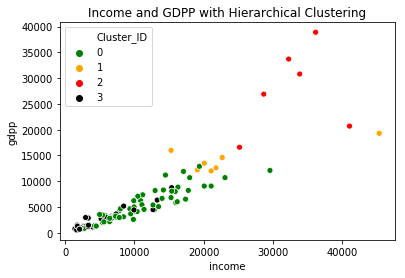

In [77]:
sns.scatterplot(x='income', y='gdpp', data=df_hierarchical, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title('Income and GDPP with Hierarchical Clustering')
plt.show()

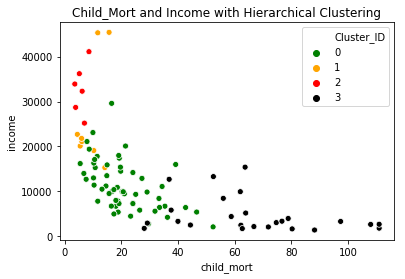

In [78]:
sns.scatterplot(x='child_mort', y='income', data=df_hierarchical, hue='Cluster_ID', palette=['green', 'orange', 'red', 'black'])
plt.title('Child_Mort and Income with Hierarchical Clustering')
plt.show()

##### Grouping the DataFrame by "Cluster_ID" column and computing other columns by their mean:

In [79]:
df_child_mort_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).child_mort.mean())
df_exports_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).exports.mean())
df_health_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).health.mean())
df_imports_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).imports.mean())
df_income_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).income.mean())
df_inflation_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).inflation.mean())
df_life_expec_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).life_expec.mean())
df_total_fer_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).total_fer.mean())
df_gdpp_hierarchical = pd.DataFrame(df_hierarchical.groupby(["Cluster_ID"]).gdpp.mean())

In [80]:
hierarchical_merged_df = pd.concat([pd.Series([0,1,2,3]), df_child_mort_hierarchical, df_exports_hierarchical, df_health_hierarchical, df_imports_hierarchical, df_income_hierarchical, df_inflation_hierarchical, df_life_expec_hierarchical,  df_total_fer_hierarchical, df_gdpp_hierarchical], axis=1)

##### Renaming the first column as "Cluster_ID":

In [81]:
hierarchical_merged_df = hierarchical_merged_df.rename(columns={0:'Cluster_ID'})
hierarchical_merged_df

,Cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,20.870909,2165.959309,353.559716,2370.067782,11410.727273,7.131255,73.640000,2.305455,5526.145455
1,1,9.250000,7881.637500,885.772500,7230.087500,26350.000000,5.145250,75.812500,1.993750,14937.500000
2,2,5.750000,11606.616667,2375.175000,11806.100000,32900.000000,2.651333,78.833333,1.763333,27933.333333
3,3,64.884615,1103.964385,140.889508,1140.267192,4831.923077,7.667115,63.130769,4.118462,2377.846154


##### Visualization through Bar Plot:

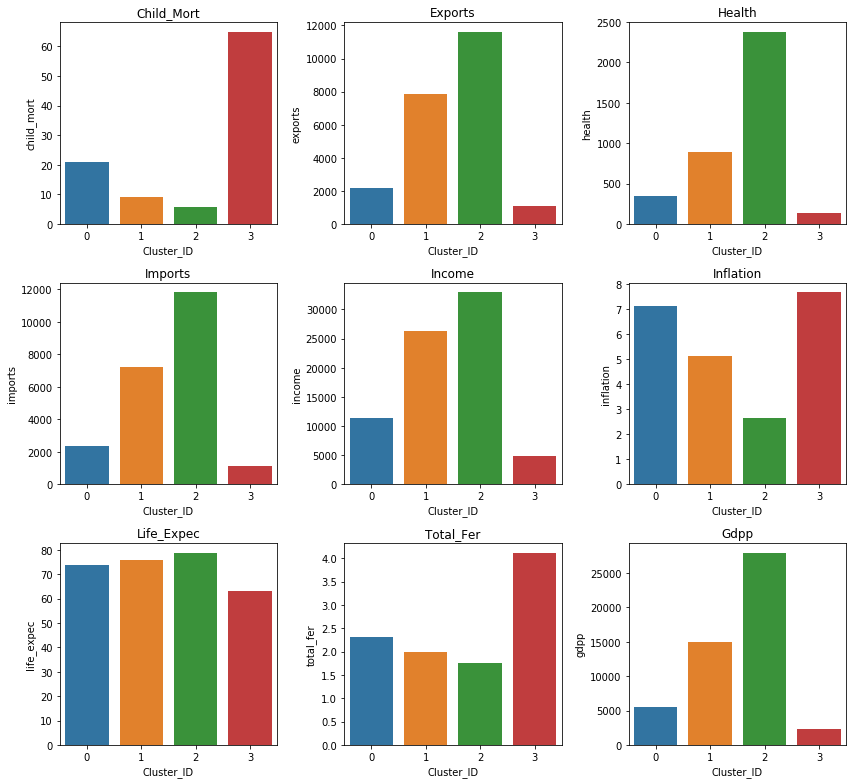

In [82]:
plt.figure(figsize=(12, 11))
for i in range(1, len(hierarchical_merged_df.columns)):
    plt.subplot(3,3, i)
    sns.barplot(x='Cluster_ID', y=hierarchical_merged_df.columns[i], data=hierarchical_merged_df)
    plt.title(hierarchical_merged_df.columns[i].title())
    plt.tight_layout()

##### Visualization through Boxplot:

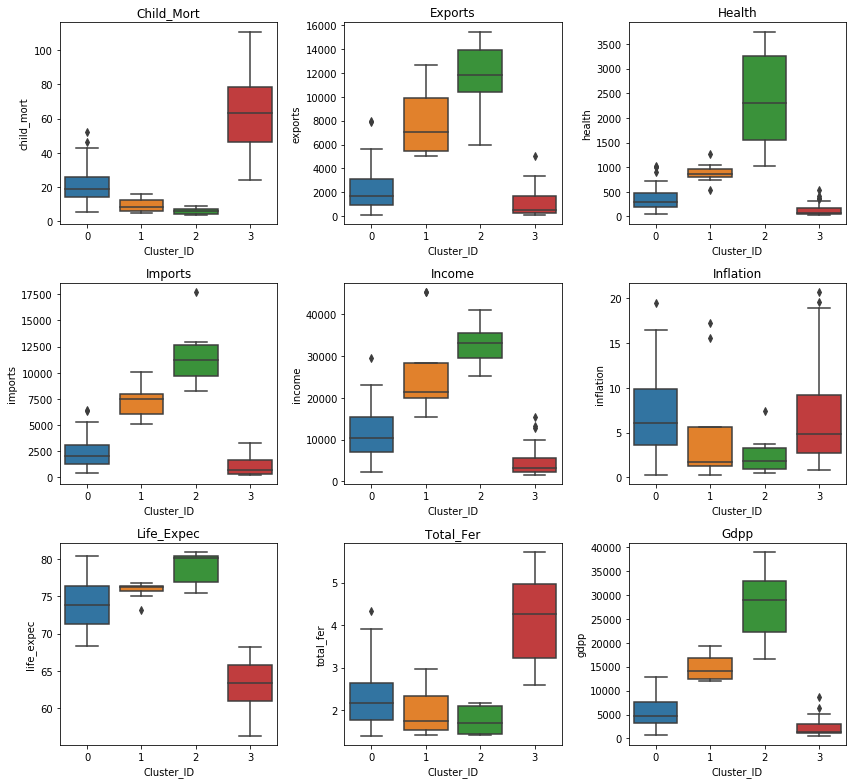

In [83]:
plt.figure(figsize=(12, 11))
for i in range(1, len(df_hierarchical.columns)-1):
    plt.subplot(3,3, i)
    sns.boxplot(x='Cluster_ID', y=df_hierarchical.columns[i], data=df_hierarchical)
    plt.title(df_hierarchical.columns[i].title())
    plt.tight_layout()

After implimentinf Hierarchical Clustering, if we look at above mentioned Barplots and Boxplots, we can observe that the cluster 3 needs more attention. Below points explain that `cluster 3` has:
- Highest Child Mortality
- Lowest Iincome
- Highest Inflation
- Lowest Life Expectancy 
- Highest Total Fertility 
- Lowest GDPP
- Lowest Health Spending

Let's list out the countries belonging to cluster 3.

##### Filtering the Dataframe with "Custer_ID == 3" and observing top 10 countries:

In [84]:
df_cluster_hierarchical = df_hierarchical.loc[(df_hierarchical['Cluster_ID']==3), :]
df_cluster_hierarchical.sort_values(by=['child_mort','exports','health','imports','income', 'inflation', 'life_expec','total_fer','gdpp'], 
                      ascending=[False, True, True, False, True, False, True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
9,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,3
24,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.390,56.3,5.27,1220,3
16,Cameroon,108.0,290.820,67.2030,353.700,2660,1.910,57.3,5.11,1310,3
58,Mauritania,97.4,608.400,52.9200,734.400,3320,18.900,68.2,4.98,1200,3
21,Comoros,88.2,126.885,34.6819,397.573,1410,3.870,65.9,4.75,769,3
34,Gambia,80.3,133.756,31.9778,239.974,1660,4.300,65.5,5.71,562,3
51,Lao,78.9,403.560,50.9580,562.020,3980,9.200,63.8,3.15,1140,3
80,Sudan,76.7,291.560,93.5360,254.560,3370,19.600,66.3,4.88,1480,3
36,Ghana,74.7,386.450,68.3820,601.290,3060,16.600,62.2,4.27,1310,3
83,Tanzania,71.9,131.274,42.1902,204.282,2090,9.250,59.3,5.43,702,3


As per the Hierarchical Clusteriing, below are the top 10 countries that are in the direst need of aid:
1. Benin
2. Cote d'Ivoire
3. Cameroon
4. Mauritania
5. Comoros
6. Gambia
7. Lao
8. Sudan
9. Ghana
10. Tanzania

# Conclusion:

As per the analysis using both K-Means and Hierarchical Clustering, we got same list of countries. So, below are the countries that are in direst need of aid by considering socio – economic factor into consideration:

1. Benin
2. Cote d'Ivoire
3. Cameroon
4. Mauritania
5. Comoros
6. Gambia
7. Lao
8. Sudan
9. Ghana
10. Tanzania